In [107]:
import tweepy

auth = tweepy.OAuthHandler('PcYGyfk0Xrsr7RQmgFefFKqcl', 'VdVUtOGBDajhDBULlHm3KCwXnlmxdldGowG9CjCOP3yhDveoEU')
auth.set_access_token('2657160098-4lSShP8CgcOIka2sPBk6iS28Iycl9X6deHc2GP7', 'LrvHFFvTH32CuqI9jaTvDASkPYzg3V5RldPi8h1yo0ALi')

api = tweepy.API(auth) #实例化api
list_followers = []
for item in tweepy.Cursor(api.followers,id = "vanatteveldt").items(150):
    list_followers.append(item.id)

In [7]:
#list_followers #这货的所有followers
his_follows = api.friends_ids("vanatteveldt")
print(his_follows)

[29039174, 262981576, 1570339038, 393352440, 156846707, 440645901, 742789639933702144, 778251283, 207421138, 11574542, 392143304, 26491157, 3014393895, 169403525, 248788118, 133321359, 21636417, 16945772, 14341961, 86916436, 92835450, 97162458, 3040699408, 873508771, 114277607, 4515151, 19909693, 180040704, 205280117, 25657150, 15269643, 21587430, 16718994, 112961086, 122405720, 115044261, 119885312, 28076891, 8442592, 193261375, 135469780, 35752351, 57190437, 406438550, 31560768, 6366042, 596773316, 878447816, 19058238, 29354944, 186894716, 16843945, 203512946, 52206988, 16708690, 121743092]


In [8]:
his_id = api.get_user("vanatteveldt").id
print(his_id)

155724548


In [10]:
his_friends = list(set(his_follows) & set(list_followers))
his_friends # his_friends

[742789639933702144,
 180040704,
 440645901,
 11574542,
 3040699408,
 778251283,
 26491157,
 248788118,
 873508771,
 3014393895,
 112961086,
 25657150,
 596773316,
 29039174,
 392143304,
 14341961,
 878447816,
 4515151,
 122405720,
 97162458,
 21587430,
 114277607,
 16945772,
 203512946,
 121743092,
 205280117,
 393352440]

In [53]:
dict_a = {his_id : his_friends[0:10]}
his_friends_s = his_friends[0:10]
his_friends_s

[742789639933702144,
 180040704,
 440645901,
 11574542,
 3040699408,
 778251283,
 26491157,
 248788118,
 873508771,
 3014393895]

In [46]:
dict_b = {}
list_f = []
friends_id = []
for item in his_friends_s:
    friends_id = api.friends_ids(item)
    list_f.extend(friends_id)
    dict_b[item] = list_f

In [47]:
list_b = list(set(his_friends) & set(list_f))
list_b

[742789639933702144,
 440645901,
 11574542,
 778251283,
 26491157,
 248788118,
 873508771,
 3014393895,
 112961086,
 596773316,
 29039174,
 392143304,
 14341961,
 4515151,
 122405720,
 97162458,
 21587430,
 114277607,
 16945772,
 121743092,
 205280117,
 393352440]

In [92]:
dict_c = {}
dict_c = {his_id : list_b}
dictMerged=dict_a.copy()
dictMerged.update(dict_c)

In [97]:
dictMerged

{155724548: [742789639933702144,
  440645901,
  11574542,
  778251283,
  26491157,
  248788118,
  873508771,
  3014393895,
  112961086,
  596773316,
  29039174,
  392143304,
  14341961,
  4515151,
  122405720,
  97162458,
  21587430,
  114277607,
  16945772,
  121743092,
  205280117,
  393352440]}

In [108]:
dict_f = {}
dict_d = {}
for item in his_friends_s[0:10]:
    friends_id = api.friends_ids(item)
    friends_id_list = list(set(friends_id) & set(his_friends))
    dict_d = {item:friends_id_list}
    dict_e = dict_d.copy()
    dict_f.update(dict_d)

In [109]:
dictMerged_2 = dictMerged.copy()
dictMerged_2.update(dict_f)

In [110]:
list_total = []
for key,value in dictMerged_2.items():
    for i in value:        
        list_total.append((str(key),str(i)))

In [112]:
list_total

[('742789639933702144', '393352440'),
 ('742789639933702144', '440645901'),
 ('180040704', '16945772'),
 ('180040704', '26491157'),
 ('180040704', '29039174'),
 ('873508771', '122405720'),
 ('155724548', '742789639933702144'),
 ('155724548', '440645901'),
 ('155724548', '11574542'),
 ('155724548', '778251283'),
 ('155724548', '26491157'),
 ('155724548', '248788118'),
 ('155724548', '873508771'),
 ('155724548', '3014393895'),
 ('155724548', '112961086'),
 ('155724548', '596773316'),
 ('155724548', '29039174'),
 ('155724548', '392143304'),
 ('155724548', '14341961'),
 ('155724548', '4515151'),
 ('155724548', '122405720'),
 ('155724548', '97162458'),
 ('155724548', '21587430'),
 ('155724548', '114277607'),
 ('155724548', '16945772'),
 ('155724548', '121743092'),
 ('155724548', '205280117'),
 ('155724548', '393352440'),
 ('3014393895', '392143304'),
 ('3014393895', '778251283'),
 ('3014393895', '112961086'),
 ('3014393895', '4515151'),
 ('440645901', '742789639933702144'),
 ('440645901', '

In [113]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(list_total)

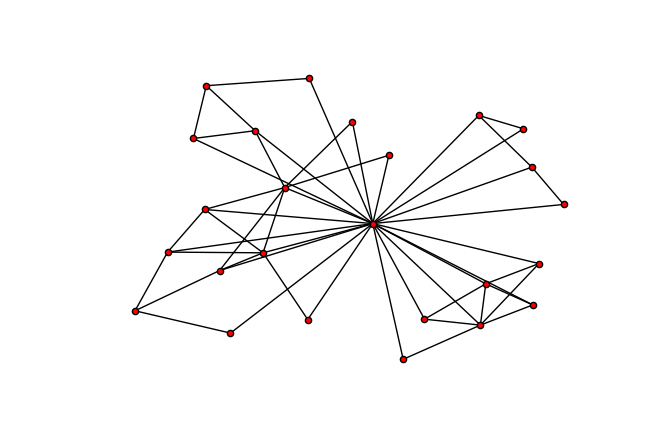

In [114]:
pos = nx.spring_layout
nx.draw_spring(G,node_size = 20)
plt.show()

In [115]:
len(list_total)

54